In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# load data 
df = pd.read_csv("assets/medical_exam.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Add an overweight to the column 
To determine if a person is overweight, 
first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
If that value is > 25 then the person is overweight. 
Use the value 0 for NOT overweight and the value 1 for overweight.
NB: actual weight in Kg, and height in cm 

In [64]:

bmi = df["weight"] / ((df["height"] / 100)**2)
# df["overweight"] = [1 if x > 25 else 0 for x in bmi] - list comprehension
df["overweight"] = np.where(bmi > 25, 1, 0) # use np.where()
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [65]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value.

In [66]:
# Create a DataFrame for the cat plot using pd.melt with values 
# from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
df_cat = df.melt(id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

# Group and reformat the data in df_cat to split it by cardio. 
# df_cat = df_cat.groupby(["cardio"])

# Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
# df_cat.size().reset_index(name="total")

# overall 
df_cat = df_cat.groupby(["cardio"]).size().reset_index(name="total")
df_cat


,cardio,total
0,0,210126
1,1,209874


Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()

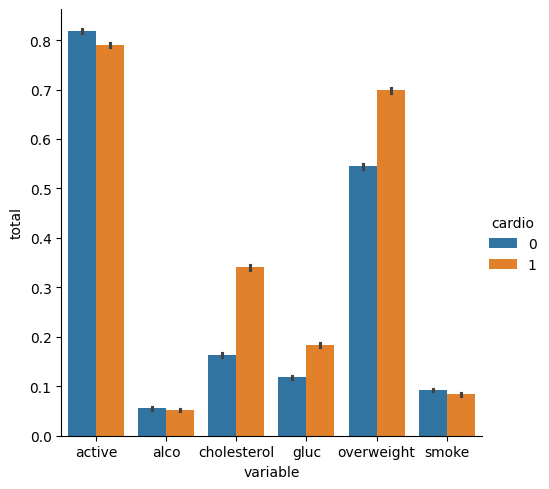

In [67]:
df_cat = df.melt(
    id_vars=["cardio"], 
    value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], 
    var_name="variable", 
    value_name="total"
)
g = sns.catplot(x="variable", y="total", hue="cardio", data=df_cat, kind="bar")

Get the figure for the output and store it in the fig variable

In [68]:
fig = g.figure
fig.savefig('assets/catplot.png')

Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:

- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile


In [69]:
height_lower_bound = df['height'].quantile(0.025)
height_upper_bound = df['height'].quantile(0.975)
weight_lower_bound = df['weight'].quantile(0.025)
weight_upper_bound = df['weight'].quantile(0.975)

df_heat = df[
    (df['height'] >= height_lower_bound) & 
    (df['height'] <= height_upper_bound) & 
    (df['weight'] >= weight_lower_bound) & 
    (df['weight'] <= weight_upper_bound)
]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Calculate the correlation matrix and store it in the corr variable

In [70]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002181,0.003944,-0.000097,0.000714,0.003768,-0.000422,0.003910,0.002358,-0.002818,-0.000276,0.006091,0.004021,0.000023
age,0.002181,1.000000,-0.017757,-0.077590,0.069472,0.019151,0.019548,0.129566,0.087250,-0.044278,-0.027868,-0.011416,0.239394,0.089305
sex,0.003944,-0.017757,1.000000,0.506438,0.130171,0.005237,0.012525,-0.036549,-0.020550,0.337130,0.168511,0.007671,0.003329,-0.052544
height,-0.000097,-0.077590,0.506438,1.000000,0.251133,0.004407,-0.000828,-0.062849,-0.030801,0.187817,0.089369,-0.005360,-0.024265,-0.148975
weight,0.000714,0.069472,0.130171,0.251133,1.000000,0.027942,0.036711,0.137249,0.106952,0.056728,0.059849,-0.014171,0.172027,0.655964
ap_hi,0.003768,0.019151,0.005237,0.004407,0.027942,1.000000,0.014851,0.023550,0.011341,-0.001523,0.000792,0.000176,0.051712,0.018184
ap_lo,-0.000422,0.019548,0.012525,-0.000828,0.036711,0.014851,1.000000,0.025632,0.012294,0.004979,0.011984,0.004747,0.063658,0.027389
cholesterol,0.003910,0.129566,-0.036549,-0.062849,0.137249,0.023550,0.025632,1.000000,0.384607,0.012849,0.039549,0.003747,0.203611,0.129020
gluc,0.002358,0.087250,-0.020550,-0.030801,0.106952,0.011341,0.012294,0.384607,1.000000,-0.003269,0.015504,-0.008916,0.087960,0.088260
smoke,-0.002818,-0.044278,0.337130,0.187817,0.056728,-0.001523,0.004979,0.012849,-0.003269,1.000000,0.341345,0.027790,-0.019529,-0.003254


Generate a mask for the upper triangle and store it in the mask variable

In [71]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

Set up the matplotlib figure

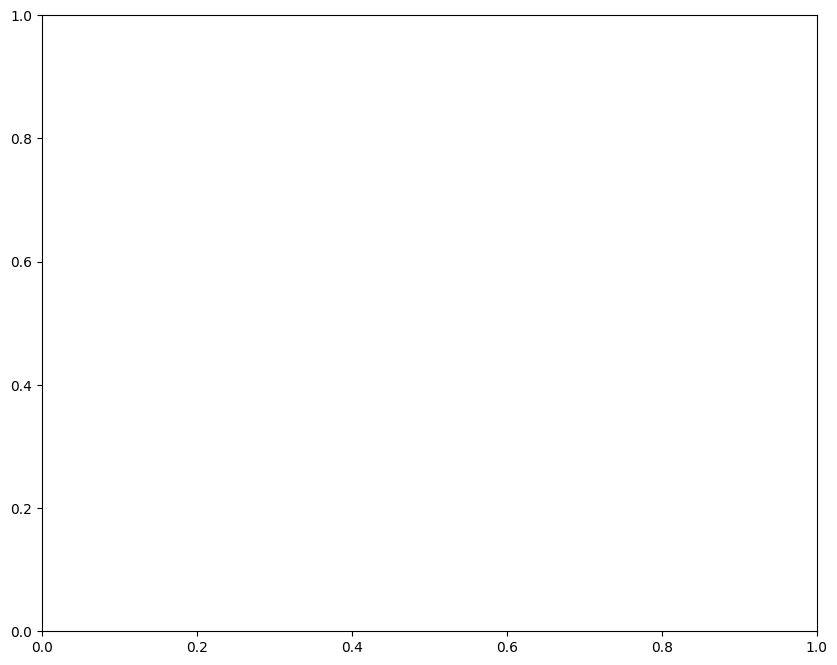

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.show()

In [74]:
# Plot the heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

<Axes: >